In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.DataFrame({'APGAR5': [3, 6, 8, 5, 9, 2, 7, 4, 10]})

In [3]:
def categorizar_apgar(apgar):
    if 0 <= apgar <= 3:
        return 'asfixia grave'
    elif 4 <= apgar <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar <= 7:
        return 'asfixia leve'
    elif 8 <= apgar <= 10:
        return 'normal'
    else:
        return 'Categoria desconhecida'

In [4]:
dados['Categoria_APGAR5'] = dados['APGAR5'].apply(categorizar_apgar)

In [5]:
print(dados)

   APGAR5  Categoria_APGAR5
0       3     asfixia grave
1       6      asfixia leve
2       8            normal
3       5  asfixia moderada
4       9            normal
5       2     asfixia grave
6       7      asfixia leve
7       4  asfixia moderada
8      10            normal


In [6]:
dados = pd.DataFrame({
    'APGAR5': [9, 8, 7, 8, 9, 7, 8, 9, 9, 7],
    'SEXO': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'GESTACAO': [38, 40, 39, 41, 37, 38, 40, 41, 38, 39]
})

In [7]:
sns.set(style="whitegrid")

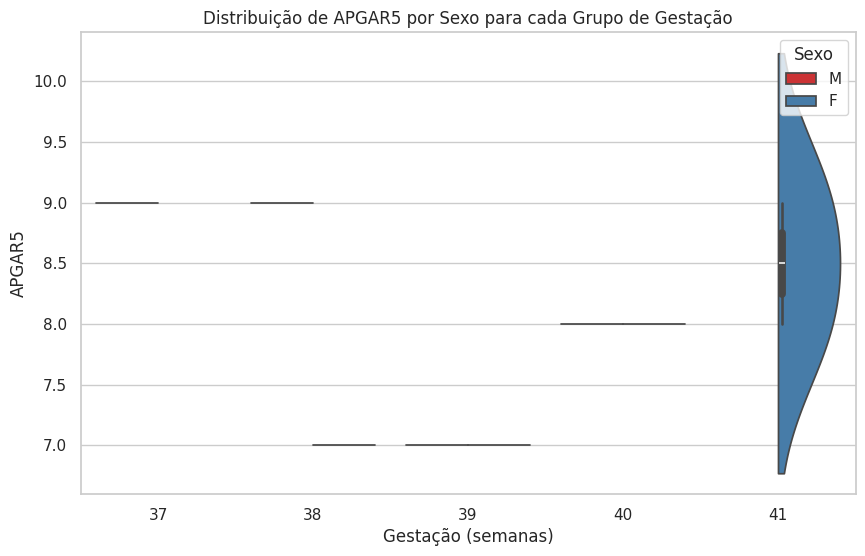

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=dados, x='GESTACAO', y='APGAR5', hue='SEXO', palette='Set1', split=True)
plt.title('Distribuição de APGAR5 por Sexo para cada Grupo de Gestação')
plt.xlabel('Gestação (semanas)')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper right')
plt.show()

In [9]:
dados = pd.DataFrame({
    'APGAR5': [9, 8, 7, 8, 9, 7, 8, 9, 9, 7],
    'GESTACAO': [38, 40, 39, 41, 37, 38, 40, 41, 38, 39]
})

In [10]:
tabela_cruzada = pd.crosstab(index=dados['GESTACAO'], columns=dados['APGAR5'])

In [11]:
print(tabela_cruzada)

APGAR5    7  8  9
GESTACAO         
37        0  0  1
38        1  0  2
39        2  0  0
40        0  2  0
41        0  1  1


In [12]:
dados = pd.DataFrame({
    'APGAR5': [9, 8, 7, 8, 9, 7, 8, 9, 9, 7],
    'GESTACAO': [38, 40, 39, 41, 37, 38, 40, 41, 38, 39]
})

In [13]:
tabela_cruzada = pd.crosstab(index=dados['GESTACAO'], columns=dados['APGAR5'])

In [14]:
percentuais_de_linha = tabela_cruzada.apply(lambda row: row / row.sum(), axis=1)

In [15]:
print(percentuais_de_linha)

APGAR5           7    8         9
GESTACAO                         
37        0.000000  0.0  1.000000
38        0.333333  0.0  0.666667
39        1.000000  0.0  0.000000
40        0.000000  1.0  0.000000
41        0.000000  0.5  0.500000


In [16]:
dados = pd.DataFrame({
    'APGAR5': [9, 8, 7, 8, 9, 7, 8, 9, 9, 7],
    'GESTACAO': [38, 40, 39, 41, 37, 38, 40, 41, 38, 39]
})

In [17]:
tabela_cruzada = pd.crosstab(index=dados['GESTACAO'], columns=dados['APGAR5'])

In [18]:
percentuais_de_linha = tabela_cruzada.apply(lambda row: row / row.sum(), axis=1)

In [19]:
prematuro = percentuais_de_linha.loc[percentuais_de_linha.index < 37]
termo = percentuais_de_linha.loc[percentuais_de_linha.index >= 37]

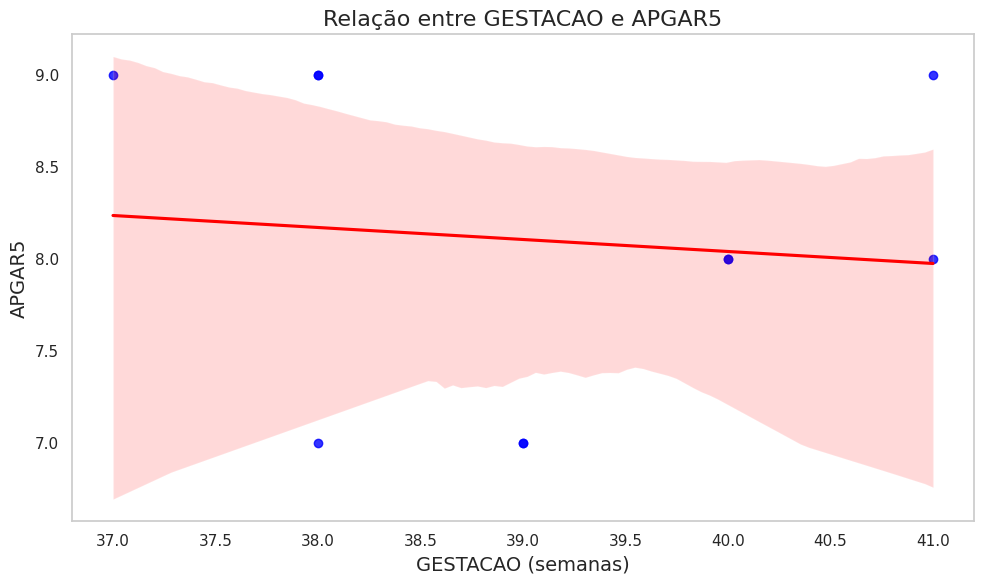

In [20]:
# Criando um gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(data=dados, x='GESTACAO', y='APGAR5', marker='o', color='blue', line_kws={"color": "red"})

# Configurando os títulos e rótulos
plt.title('Relação entre GESTACAO e APGAR5', fontsize=16)
plt.xlabel('GESTACAO (semanas)', fontsize=14)
plt.ylabel('APGAR5', fontsize=14)

# Exibindo o gráfico
plt.grid()
plt.tight_layout()
plt.show()